# Python course 2021 - Exercises E

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part1 - modules



---
1.1) Write all AGIs of AtCol0_exons.fasta into a new file!


In [2]:
def get_gene_identifiers(input, output):
  with open(input, 'r') as input_file:
    with open(output, 'w') as output_file:
      for line in input_file:
        if line.startswith(">"):
          identifier = line[1:].split(".")[0]
          output_file.write(identifier + "\n")

input = "/content/drive/MyDrive/PythonProgramming/AtCol0_Exons.fasta"
output = "/content/drive/MyDrive/PythonProgramming/AtCol0_gene_identifiers.txt"
get_gene_identifiers(input, output)

def get_num_lines(input):
  num_lines = 0
  with open(input, 'r') as input_file:
    for line in input_file:
      num_lines += 1
  return num_lines

print(get_num_lines("/content/drive/MyDrive/PythonProgramming/AtCol0_gene_identifiers.txt"))

217183




---
1.2) Some IDs occur multiple times. Add a filter step to reduce the results to unique IDs!


In [3]:
def get_unique_gene_identifiers(input, output):
  # use the built-in set data structure
  identifier_set = set()
  with open(input, 'r') as input_file:
    for line in input_file:
      if line.startswith(">"):
        identifier = line[1:].split(".")[0]
        identifier_set.add(identifier)
  
  with open(output, 'w') as output_file:
    for identifier in identifier_set:
      output_file.write(identifier + "\n")

output = "/content/drive/MyDrive/PythonProgramming/AtCol0_unique_gene_identifiers.txt"
get_unique_gene_identifiers(input, output)

get_num_lines("/content/drive/MyDrive/PythonProgramming/AtCol0_unique_gene_identifiers.txt")

33602



---
1.3) Calculate the frequency of each AGI and construct a histogram (matplotlib)!
```
plt.hist(<list_of_values>)    #tip
```




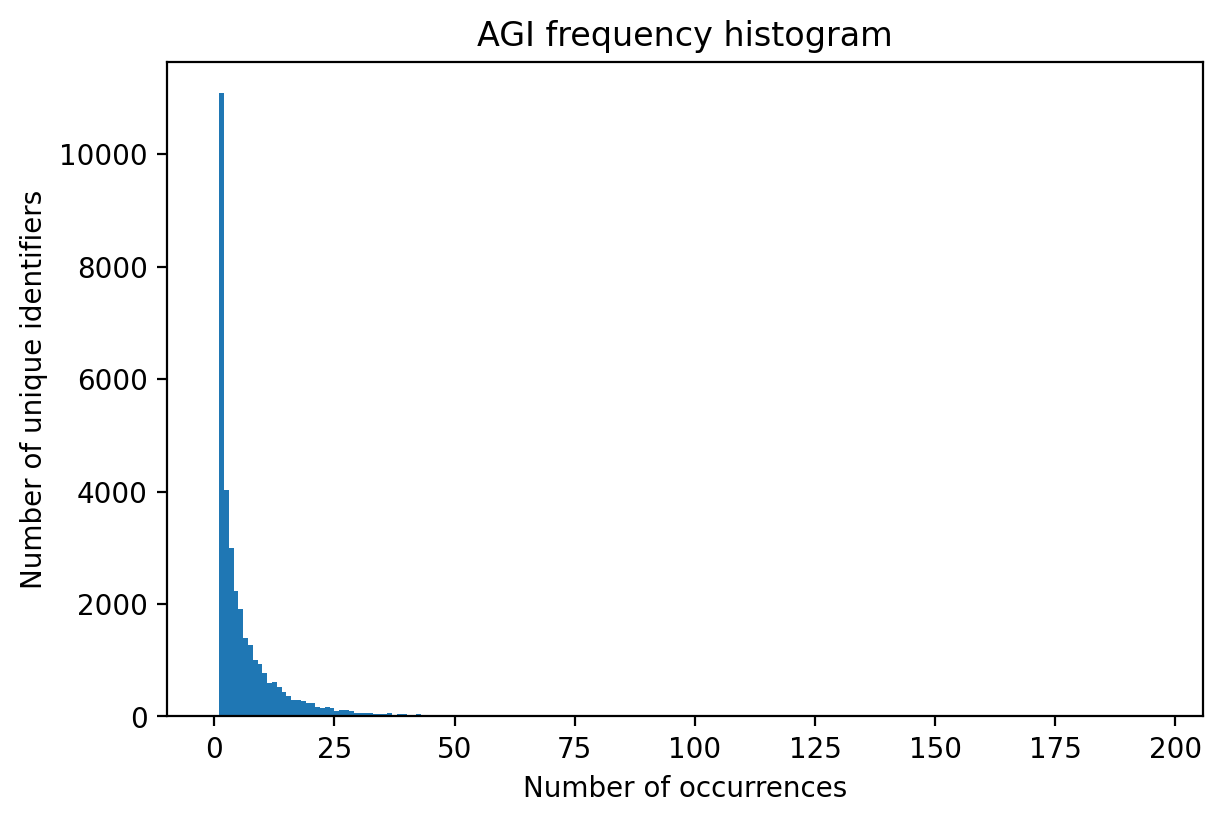

In [4]:
import matplotlib.pyplot as plt

def get_identifier_frequencies(input):
  # use a dictionary to keep track of the number of occurrences of each identifier
  identifier_occurrences = {}
  with open(input, 'r') as input_file:
    for line in input_file:
      if line.startswith(">"):
        identifier = line[1:].split(".")[0]
        identifier_occurrences[identifier] = identifier_occurrences.setdefault(identifier, 0) + 1
  return identifier_occurrences

def plot_frequency_histogram(input, output):
  identifier_occurrences = get_identifier_frequencies(input)
  
  fig, ax = plt.subplots(constrained_layout=True, dpi=200)
  ax.hist(identifier_occurrences.values(), bins=range(max(identifier_occurrences.values()) + 1))
  ax.set_xlabel("Number of occurrences")
  ax.set_ylabel("Number of unique identifiers")
  ax.set_title("AGI frequency histogram")

  fig.savefig(output)

plot_frequency_histogram(input, "/content/drive/MyDrive/PythonProgramming/AtCol0_identifier_frequency_histogram.png")

**Additional exercises**

1.4) Create a bar chart with matplotlib that shows the frequencies of the five most common AGIs.

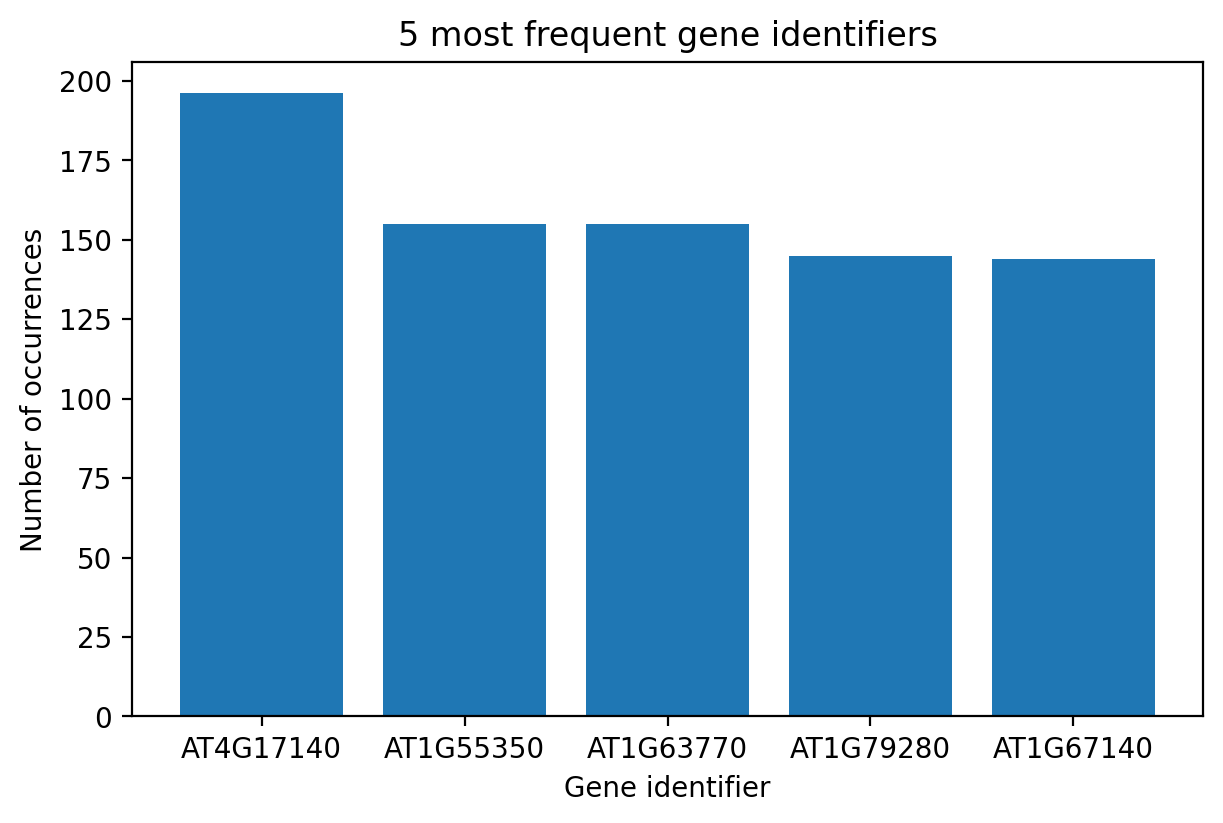

In [6]:
from heapq import nlargest

"""
Finds the k most frequent gene identifiers.
"""
def get_most_frequent_gene_identifiers(identifier_occurrences, k):
  most_frequent_identifiers = nlargest(k, identifier_occurrences.keys(), key=lambda identifier: identifier_occurrences[identifier])
  
  frequencies = []
  for identifier in most_frequent_identifiers:
    frequencies += [identifier_occurrences[identifier]]

  return most_frequent_identifiers, frequencies

"""
Create a bar plot for the k most frequent gene identifiers.
"""
def plot_most_frequent_identifiers(input, output, k):
  identifiers, frequencies = get_most_frequent_gene_identifiers(get_identifier_frequencies(input), k)

  fig, ax = plt.subplots(constrained_layout=True, dpi=200)
  ax.bar(range(len(identifiers)), frequencies, tick_label=identifiers)
  ax.set_xlabel("Gene identifier")
  ax.set_ylabel("Number of occurrences")
  ax.set_title(f"{k} most frequent gene identifiers")

  fig.savefig(output)

get_most_frequent_gene_identifiers(get_identifier_frequencies(input), 5)
plot_most_frequent_identifiers(input, "/content/drive/MyDrive/PythonProgramming/AtCol0_most_frequent_identifiers_bar_plot.png", 5)